In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4735 - accuracy: 0.8367
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4706 - accuracy: 0.8392
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4614 - accuracy: 0.8419
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4652 - accuracy: 0.8414
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4545 - accuracy: 0.8438
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4596 - accuracy: 0.8438
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4485 - accuracy: 0.8481
Epoch 8/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4571 - accuracy: 0.8451
Epoch 9/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4520 - accuracy: 0.8456
Epoch 10/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.447

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.6018 - accuracy: 0.8240

Test accuracy: 0.8240000009536743


In [9]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [10]:
predictions = probability_model.predict(test_images)

In [11]:
predictions[0]

array([0.0000000e+00, 5.0956129e-23, 0.0000000e+00, 1.8724191e-24,
       0.0000000e+00, 1.3280983e-02, 0.0000000e+00, 4.0139876e-02,
       1.0668631e-26, 9.4657916e-01], dtype=float32)

In [12]:
np.argmax(predictions[0])

9

In [13]:
test_labels[0]

9

In [14]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

NameError: name 'class_names' is not defined

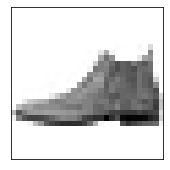

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

NameError: name 'class_names' is not defined

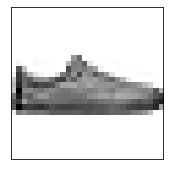

In [16]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

NameError: name 'class_names' is not defined

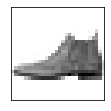

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()